# Analysis of Philippine Population from 1960 to 2016

## Introduction

This notebook aims to explore trends in world, and Philippine populations from 1960 until 2016. All data sets are taken from [World Bank](https://data.worldbank.org/).

In [1]:
#import the necessary modules; invoke the inline argument; and set the style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline 
sns.set_style('whitegrid')

## Total World Population

In [2]:
#load and explore the data

data_population = pd.read_csv('data_sources/API_SP.POP.TOTL_DS2_en_csv_v2.csv',header=2) #setting the header value to 2 is needed as there are blank rows
data_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [3]:
data_population.shape


(264, 63)

In [4]:
# looking at the data there is a need to drop the columns 2017 and Unnamed:62
# the indicator code, country code, and the indicator name can also be dropped
data_population = data_population.drop(columns=['2017','Unnamed: 62', 'Indicator Name', 'Indicator Code'])
data_population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


## Population Trends in Selected Southeast Asian Countries

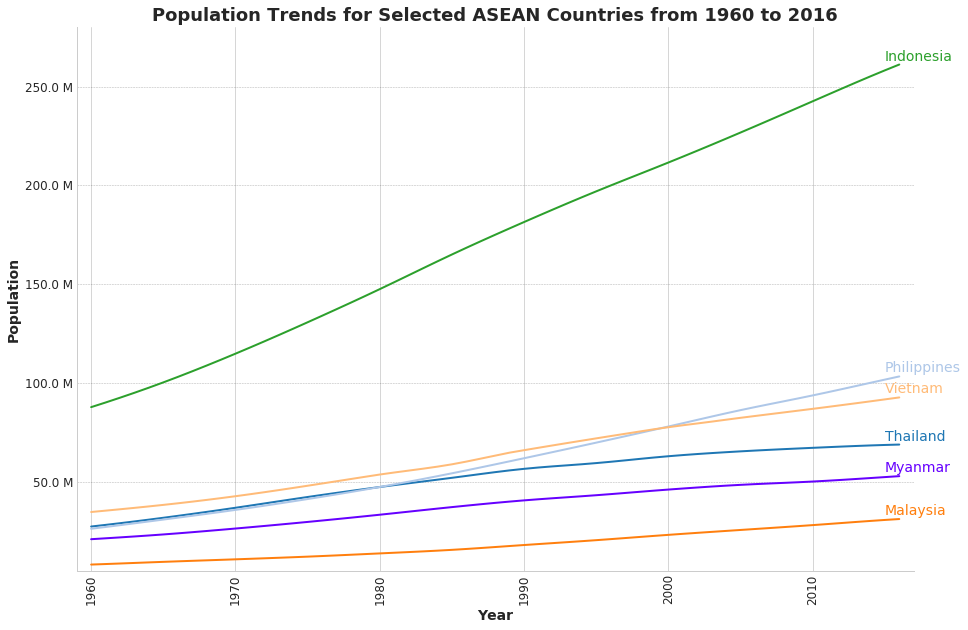

In [5]:
#set the plot size in inches
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#make a list of countries to analyze
asean_countries = ['Thailand','Philippines','Malaysia','Vietnam','Indonesia','Myanmar']
#select a color scheme
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#6600ff']

#remove the spines from the top and the bottom of the figure
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for index, country in enumerate(asean_countries):
    
    #obtain the total population data from each country
    data_country = data_population[data_population['Country Name'] == country]
    data_country = data_country.iloc[0,2:]
    
    #get the x_axis and y_axis
    y_axis = list(data_country)
    x_axis = data_country.index.astype(int) #change the datatype (it is a string change it to int)
    
    #plot
    ax.plot(x_axis, y_axis, lw = 2.0, color=color_sequence[index])
    
    #insert a label on the line
    plt.text(2015, y_axis[-1]+2000000, country, fontsize = 14, color = color_sequence[index])


#format the ticklabels    
plt.xticks(rotation = 90, family = 'sans-serif', fontsize = 12)

#use FuncFormatter for the y-tick labels
#the function below was copied from the documentation for FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '{} M'.format((x*1e-6))

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)
plt.yticks(family = 'sans-serif', fontsize = 12)

#add titles, axis labels, set the font size, weight, and family
plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
plt.ylabel('Population', family = 'sans-serif', fontsize = 14, weight = 'bold')
plt.title('Population Trends for Selected ASEAN Countries from 1960 to 2016', family = 'sans-serif', size = 18, 
          weight = 'bold')

#set the limit of the plotting area
#add 1 year on both sides of the x-axis for aesthetic purpose
plt.xlim(1959,2017)
plt.ylim(5000000,280000000)

#create a grid for for easier reading
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

#remove the tickmarks
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')


#export the plot in any of the following format: jpeg, png, pdf, etc... (uncomment the code below to do that)
#plt.savefig('population_trends_asean.jpeg', bbox_inches='tight')

#show the plot
plt.show()


In [6]:
#create a function that will return the growth rate (in percent) between two values
def growth_rate_computer(value1,value2):
    return ((value2 - value1) / value1) * 100

#initialize an empty dict that will contain the growth rate of the country (the keys) per year (the values in dataframe)
growth_rate_country = dict()

for index, country in enumerate(list(data_population['Country Name'])):
    #select each country
    data_country = data_population[data_population['Country Name'] == country]
    data_country = data_country.iloc[0,2:]
    
    #obtain its population according to year
    population = list(data_country)
    year = list(data_country.index.astype(int)) #change the datatype (it is a string change it to int)
    
    #initialize an empty list that will contain the growth rates
    growth_rate = list()
    
    #calculate the growth rate year-on-year for each country using the function defined above
    for i in range(len(year)):
        if i == 0:
            growth_rate.append(0)
        else:
            rate = growth_rate_computer(population[i-1],population[i])
            growth_rate.append(rate)
    
    growth_rate_country[country] = pd.DataFrame({'year':year,
                                                 'population':population,
                                                 'growth_rate':growth_rate
        
    })
    

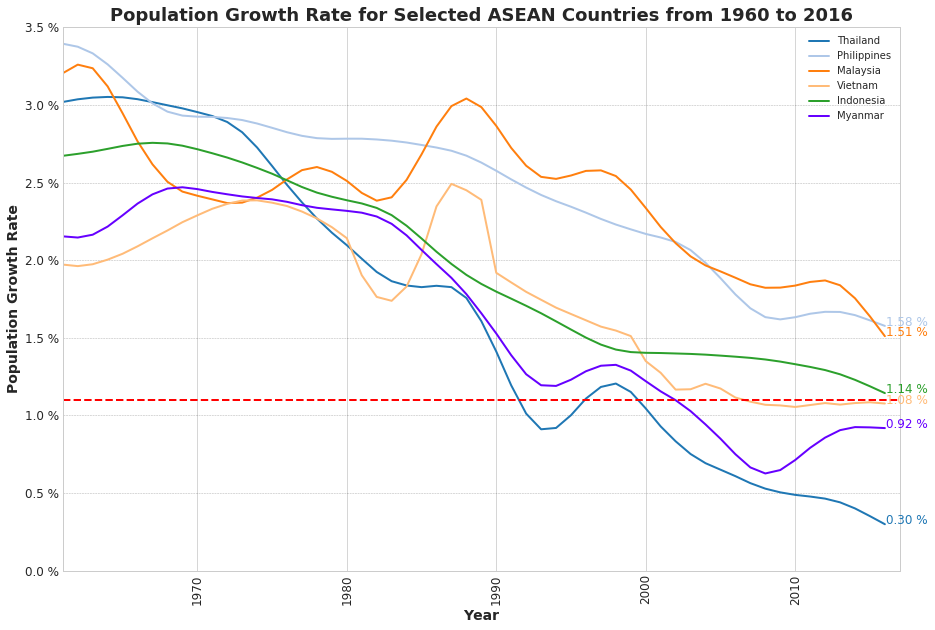

In [7]:
#use a function so that changes made inside the function, especially those concerning variable names will not affect the whole notebook
def plot_population_growth_rate():
    
    #create a plot showing the population growth rate of each country
    #set the plot size in inches
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    #make a list of countries to analyze
    asean_countries = ['Thailand','Philippines','Malaysia','Vietnam','Indonesia', 'Myanmar']

    #make a list of colors to be used
    color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#6600ff']

    for index, item in enumerate(asean_countries):
        #obtain the data
        data = growth_rate_country[item]

        #set the x and y values
        x_values = list(data['year'])
        y_values = list(data['growth_rate'])

        #plot the graph
        ax.plot(x_values, y_values, lw = 2.0, color=color_sequence[index], label = item) # addint the label term allows us to add a legend later

        plt.text(2016.1, y_values[-1], '{:.2f} %'.format(y_values[-1]), fontsize = 12, color = color_sequence[index])


    #add a horizontal line indicating the sustainable growth rate
    ax.axhline(y=1.1, linewidth = 2, color='red', linestyle = '--')
    
    #format the x-tick labels    
    plt.xticks(rotation = 90, family = 'sans-serif', fontsize = 12)

    #format the y-tick labels
    def percent(x, pos):
        'The two args are the value and tick position'
        return '{} %'.format(x)

    formatter = FuncFormatter(percent)

    ax.yaxis.set_major_formatter(formatter)
    plt.yticks(family = 'sans-serif', fontsize = 12)

    #add titles, axis labels, set the font size, weight, and family
    plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
    plt.ylabel('Population Growth Rate', family = 'sans-serif', fontsize = 14, weight = 'bold')
    plt.title('Population Growth Rate for Selected ASEAN Countries from 1960 to 2016', family = 'sans-serif', size = 18, 
              weight = 'bold')

    #set the limit of the plotting area
    #add 1 year on both sides of the x-axis for aesthetic purpose
    plt.xlim(1961,2017)
    plt.ylim(0,3.5)

    #create a grid for for easier reading
    plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

    #remove the tickmarks
    plt.tick_params(axis='both', which='both', bottom='off', top='off',
                    labelbottom='on', left='off', right='off', labelleft='on')

    plt.legend()

    #export the plot in any of the following format: jpeg, png, pdf, etc... (uncomment the code below to do that)
    #plt.savefig('population_growth_rate_asean.jpeg', bbox_inches='tight')

    plt.show()

plot_population_growth_rate()

## Philippines Compared to its ASEAN Neighbors

I selected the six big (in terms of population) countries in ASEAN for this initial analysis. I want to explore how our population is growing compared to our immediate neighbors. From the data it is evident that Thailand is the most successful in curbing its population. It 2016 growth rate of 0.30% is the lowest among the six countries, and is five times lower than the Philippines, which is still high at 1.58% despite the government's recent effort to focus on reproductive health.

Up until the mid to late 90s the Vietnam is more populous than the Philippines. However, the latter has since overtaken it. Vietnam's growth rate of 1.08% is half a percentage lower than that of the Philippines.

## Most Populous Countries Comparisson

In [8]:
#obtain data on country codes; this will be used to filter data_population which contains regional, continental, and world totals
country_codes = pd.read_csv('data_sources/country_codes.csv')
country_codes_list = list(country_codes['alpha-3'])

In [9]:
#filter only the country data from data_population
countries_population = data_population[data_population['Country Code'].isin(country_codes_list)]

In [10]:
#get the top 20 most populous nation in 2016
top_20_most_populous_2016 = countries_population.sort_values(by=['2016'],ascending = False)
top_20_most_populous_2016 = top_20_most_populous_2016.iloc[:20].reset_index(drop =  True)
print(top_20_most_populous_2016[['Country Name', '2016']])

          Country Name          2016
0                China  1.378665e+09
1                India  1.324171e+09
2        United States  3.231275e+08
3            Indonesia  2.611155e+08
4               Brazil  2.076529e+08
5             Pakistan  1.932035e+08
6              Nigeria  1.859896e+08
7           Bangladesh  1.629516e+08
8   Russian Federation  1.443424e+08
9               Mexico  1.275404e+08
10               Japan  1.269945e+08
11         Philippines  1.033202e+08
12            Ethiopia  1.024032e+08
13    Egypt, Arab Rep.  9.568868e+07
14             Vietnam  9.270110e+07
15             Germany  8.266768e+07
16  Iran, Islamic Rep.  8.027743e+07
17              Turkey  7.951243e+07
18    Congo, Dem. Rep.  7.873615e+07
19            Thailand  6.886351e+07


In [11]:
#get the top 20 most populous nation in 1960
top_20_most_populous_1960 = countries_population.sort_values(by=['1960'],ascending = False)
top_20_most_populous_1960 = top_20_most_populous_1960.iloc[:20].reset_index(drop =  True)
print(top_20_most_populous_1960[['Country Name', '1960']])  

          Country Name         1960
0                China  667070000.0
1                India  449480608.0
2        United States  180671000.0
3   Russian Federation  119897000.0
4                Japan   92500572.0
5            Indonesia   87792515.0
6              Germany   72814900.0
7               Brazil   72207554.0
8       United Kingdom   52400000.0
9                Italy   50199700.0
10          Bangladesh   48199747.0
11              France   46814237.0
12             Nigeria   45137812.0
13            Pakistan   44908293.0
14             Ukraine   42662149.0
15              Mexico   38174112.0
16             Vietnam   34743000.0
17               Spain   30455000.0
18              Poland   29637450.0
19              Turkey   27472331.0


In [12]:
# get the most populous countries in 1960 and 2016 in a list
populous_countries_1960 = set(top_20_most_populous_1960['Country Name'])
populous_countries_2016 = set(top_20_most_populous_2016['Country Name'])

In [13]:
countries_entered_top20 = list(populous_countries_2016.difference(populous_countries_1960))
countries_exited_top20 = list(populous_countries_1960.difference(populous_countries_2016))

In [14]:
countries_entered_top20

['Philippines',
 'Egypt, Arab Rep.',
 'Ethiopia',
 'Thailand',
 'Congo, Dem. Rep.',
 'Iran, Islamic Rep.']

In [15]:
countries_exited_top20

['United Kingdom', 'Poland', 'Spain', 'Italy', 'Ukraine', 'France']

In [16]:
#combine the list of countries
combined_entered_exited_top20 = countries_exited_top20 + countries_entered_top20
combined_entered_exited_top20

['United Kingdom',
 'Poland',
 'Spain',
 'Italy',
 'Ukraine',
 'France',
 'Philippines',
 'Egypt, Arab Rep.',
 'Ethiopia',
 'Thailand',
 'Congo, Dem. Rep.',
 'Iran, Islamic Rep.']

In [17]:
#in order to perform analysis on this country, it is necessary to combine the two dataframes
#containing the most populous countries in 1960 and in 2016
combined_df_populous_1960_2016 = pd.concat([top_20_most_populous_1960,top_20_most_populous_2016]).drop_duplicates().reset_index(drop=True)
combined_df_populous_1960_2016.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,China,CHN,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,735400000.0,754550000.0,...,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09
1,India,IND,449480608.0,458494963.0,467852537.0,477527970.0,487484535.0,497702365.0,508161935.0,518889779.0,...,1.179681e+09,1.197147e+09,1.214270e+09,1.230981e+09,1.247236e+09,1.263066e+09,1.278562e+09,1.293859e+09,1.309054e+09,1.324171e+09
2,United States,USA,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,198712000.0,...,3.012312e+08,3.040940e+08,3.067715e+08,3.093482e+08,3.116634e+08,3.139984e+08,3.162049e+08,3.185635e+08,3.208966e+08,3.231275e+08
3,Russian Federation,RUS,119897000.0,121236000.0,122591000.0,123960000.0,125345000.0,126745000.0,127468000.0,128196000.0,...,1.428051e+08,1.427424e+08,1.427853e+08,1.428494e+08,1.429609e+08,1.432017e+08,1.435069e+08,1.438197e+08,1.440969e+08,1.443424e+08
4,Japan,JPN,92500572.0,94943000.0,95832000.0,96812000.0,97826000.0,98883000.0,99790000.0,100725000.0,...,1.280010e+08,1.280630e+08,1.280470e+08,1.280700e+08,1.278330e+08,1.276290e+08,1.274450e+08,1.272760e+08,1.271410e+08,1.269945e+08


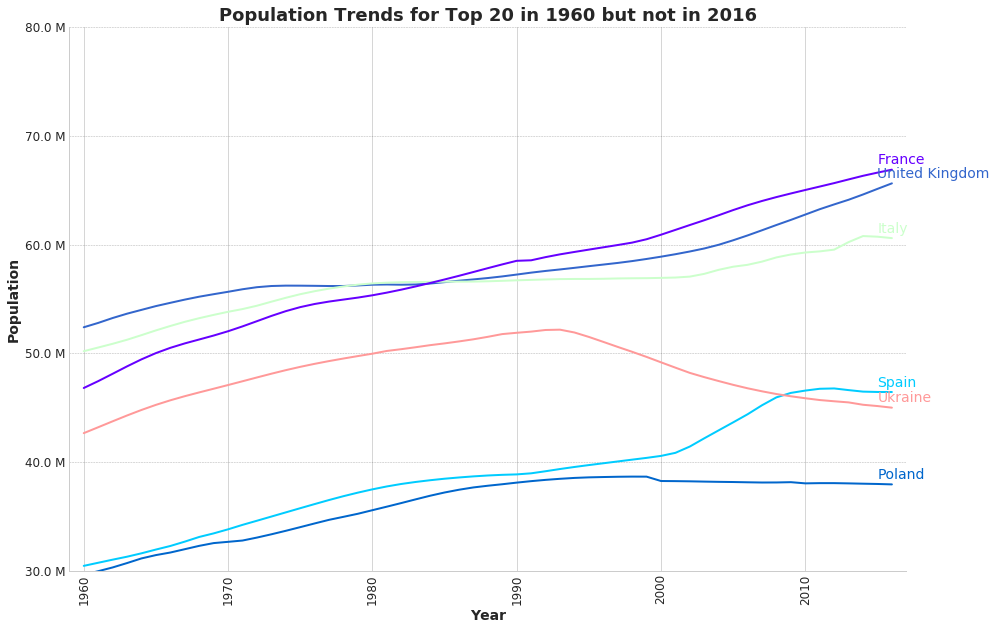

In [18]:
#set the plot size in inches
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


#select a color scheme
color_sequence = ['#3366cc','#0066cc', '#00ccff', '#ccffcc', '#ff9999', '#6600ff', '#336600',
                  '#ffcc66', '#b37400', '#cc0099', '#002db3', '#00cc00', '#00cccc', '#e600e6',
                  '#ffb3ff', '#99b3ff', '#990000', '#ccff99', '#99ffff', '#9999ff', '#e699ff',
                  '#00b33c', '#b3ffcc', '#99e6e6', '#0073e6', '#003366']

#remove the spines from the top and the bottom of the figure
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for index, country in enumerate(countries_exited_top20):
    
    #obtain the total population data from each country
    data_country = data_population[data_population['Country Name'] == country]
    data_country = data_country.iloc[0,2:]
    
    #get the x_axis and y_axis
    y_axis = list(data_country)
    x_axis = data_country.index.astype(int) #change the datatype (it is a string change it to int)
    
    #plot
    ax.plot(x_axis, y_axis, lw = 2.0, color=color_sequence[index])
    
    #insert a label on the line
    plt.text(2015, y_axis[-1]+500000, country, fontsize = 14, color = color_sequence[index])


#format the ticklabels    
plt.xticks(rotation = 90, family = 'sans-serif', fontsize = 12)

#use FuncFormatter for the y-tick labels
#the function below was copied from the documentation for FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '{} M'.format((x*1e-6))

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)
plt.yticks(family = 'sans-serif', fontsize = 12)

#add titles, axis labels, set the font size, weight, and family
plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
plt.ylabel('Population', family = 'sans-serif', fontsize = 14, weight = 'bold')
plt.title('Population Trends for Top 20 in 1960 but not in 2016', family = 'sans-serif', size = 18, 
          weight = 'bold')

#set the limit of the plotting area
#add 1 year on both sides of the x-axis for aesthetic purpose
plt.xlim(1959,2017)
plt.ylim(30000000,80000000)

#create a grid for for easier reading
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

#remove the tickmarks
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')


#export the plot in any of the following format: jpeg, png, pdf, etc... (uncomment the code below to do that)
#plt.savefig('population_trends_asean.jpeg', bbox_inches='tight')

#show the plot
plt.show()


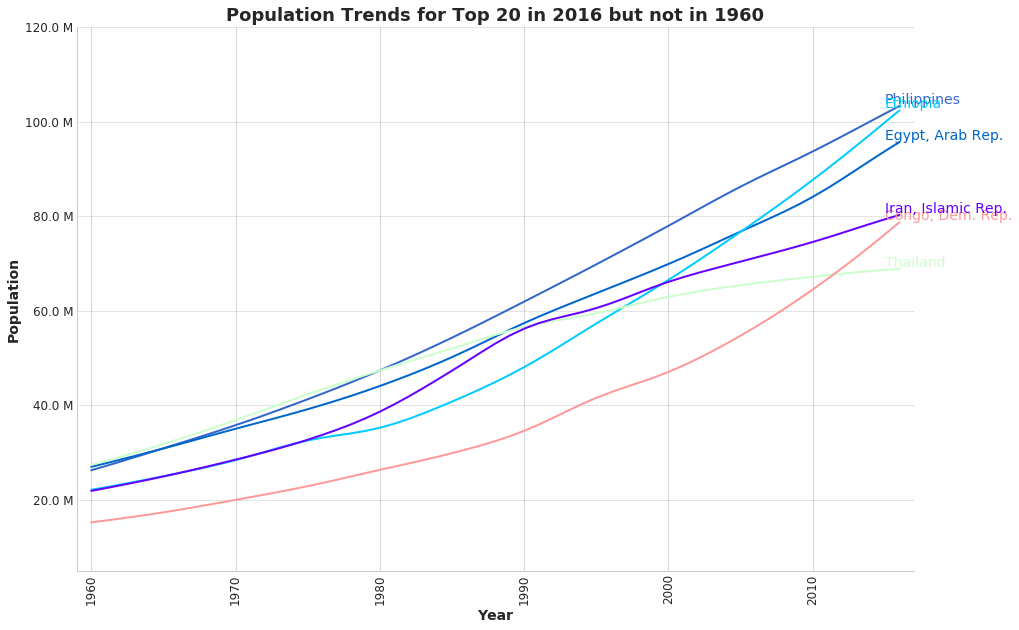

In [19]:
#set the plot size in inches
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


#select a color scheme
color_sequence = ['#3366cc','#0066cc', '#00ccff', '#ccffcc', '#ff9999', '#6600ff', '#336600',
                  '#ffcc66', '#b37400', '#cc0099', '#002db3', '#00cc00', '#00cccc', '#e600e6',
                  '#ffb3ff', '#99b3ff', '#990000', '#ccff99', '#99ffff', '#9999ff', '#e699ff',
                  '#00b33c', '#b3ffcc', '#99e6e6', '#0073e6', '#003366']

#remove the spines from the top and the bottom of the figure
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for index, country in enumerate(countries_entered_top20):
    
    #obtain the total population data from each country
    data_country = data_population[data_population['Country Name'] == country]
    data_country = data_country.iloc[0,2:]
    
    #get the x_axis and y_axis
    y_axis = list(data_country)
    x_axis = data_country.index.astype(int) #change the datatype (it is a string change it to int)
    
    #plot
    ax.plot(x_axis, y_axis, lw = 2.0, color=color_sequence[index])
    
    #insert a label on the line
    plt.text(2015, y_axis[-1]+500000, country, fontsize = 14, color = color_sequence[index])


#format the ticklabels    
plt.xticks(rotation = 90, family = 'sans-serif', fontsize = 12)

#use FuncFormatter for the y-tick labels
#the function below was copied from the documentation for FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '{} M'.format((x*1e-6))

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)
plt.yticks(family = 'sans-serif', fontsize = 12)

#add titles, axis labels, set the font size, weight, and family
plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
plt.ylabel('Population', family = 'sans-serif', fontsize = 14, weight = 'bold')
plt.title('Population Trends for Top 20 in 2016 but not in 1960', family = 'sans-serif', size = 18, 
          weight = 'bold')

#set the limit of the plotting area
#add 1 year on both sides of the x-axis for aesthetic purpose
plt.xlim(1959,2017)
plt.ylim(5000000,120000000)

#create a grid for for easier reading
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

#remove the tickmarks
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')


#export the plot in any of the following format: jpeg, png, pdf, etc... (uncomment the code below to do that)
#plt.savefig('population_trends_asean.jpeg', bbox_inches='tight')

#show the plot
plt.show()


In [20]:
#filter only the country data from data_population
summary_population = data_population[~data_population['Country Code'].isin(country_codes_list)]
summary_population.head(40)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,Arab World,ARB,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,1.092306e+08,1.124069e+08,...,3.316538e+08,3.398255e+08,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08
34,Central Europe and the Baltics,CEB,9.140158e+07,9.223712e+07,9.301489e+07,9.384575e+07,9.472260e+07,9.544706e+07,9.614864e+07,9.704359e+07,...,1.055045e+08,1.051267e+08,1.049244e+08,1.045438e+08,1.041740e+08,1.039353e+08,1.037137e+08,1.034962e+08,1.032578e+08,1.029741e+08
36,Channel Islands,CHI,1.094200e+05,1.103990e+05,1.114570e+05,1.125950e+05,1.137730e+05,1.149950e+05,1.162270e+05,1.174740e+05,...,1.565130e+05,1.575810e+05,1.586030e+05,1.595810e+05,1.604970e+05,1.613580e+05,1.621800e+05,1.629690e+05,1.637580e+05,1.645410e+05
47,Caribbean small states,CSS,4.198307e+06,4.277802e+06,4.357746e+06,4.436804e+06,4.513246e+06,4.585777e+06,4.653919e+06,4.718167e+06,...,6.851221e+06,6.895315e+06,6.939534e+06,6.984096e+06,7.029022e+06,7.074129e+06,7.118888e+06,7.162679e+06,7.204948e+06,7.245472e+06
59,East Asia & Pacific (excluding high income),EAP,8.960287e+08,8.952983e+08,9.068848e+08,9.297551e+08,9.522707e+08,9.758067e+08,1.002935e+09,1.029192e+09,...,1.922658e+09,1.936775e+09,1.950768e+09,1.964692e+09,1.978728e+09,1.993009e+09,2.007435e+09,2.022021e+09,2.036553e+09,2.051431e+09
60,Early-demographic dividend,EAR,9.792269e+08,1.002453e+09,1.026507e+09,1.051326e+09,1.076932e+09,1.103305e+09,1.130426e+09,1.158369e+09,...,2.777286e+09,2.820960e+09,2.864730e+09,2.908808e+09,2.952874e+09,2.996573e+09,3.040241e+09,3.083836e+09,3.127290e+09,3.170542e+09
61,East Asia & Pacific,EAS,1.042017e+09,1.045308e+09,1.059467e+09,1.084916e+09,1.109997e+09,1.136132e+09,1.165701e+09,1.194330e+09,...,2.160432e+09,2.175832e+09,2.190811e+09,2.205615e+09,2.220358e+09,2.235430e+09,2.250552e+09,2.265898e+09,2.281203e+09,2.296786e+09
62,Europe & Central Asia (excluding high income),ECA,2.790879e+08,2.834170e+08,2.877618e+08,2.921203e+08,2.964631e+08,3.007408e+08,3.043562e+08,3.080398e+08,...,3.986937e+08,3.997391e+08,4.014729e+08,4.034707e+08,4.055220e+08,4.077066e+08,4.101266e+08,4.125110e+08,4.149757e+08,4.174246e+08
63,Europe & Central Asia,ECS,6.672464e+08,6.749730e+08,6.829387e+08,6.909627e+08,6.989057e+08,7.066090e+08,7.133411e+08,7.198798e+08,...,8.784660e+08,8.819658e+08,8.855917e+08,8.890162e+08,8.910950e+08,8.946667e+08,8.988551e+08,9.030947e+08,9.074248e+08,9.119953e+08
66,Euro area,EMU,2.653965e+08,2.678253e+08,2.703248e+08,2.728764e+08,2.753822e+08,2.778567e+08,2.801475e+08,2.821145e+08,...,3.326452e+08,3.342747e+08,3.353609e+08,3.361515e+08,3.354258e+08,3.361673e+08,3.372969e+08,3.384296e+08,3.395192e+08,3.408946e+08


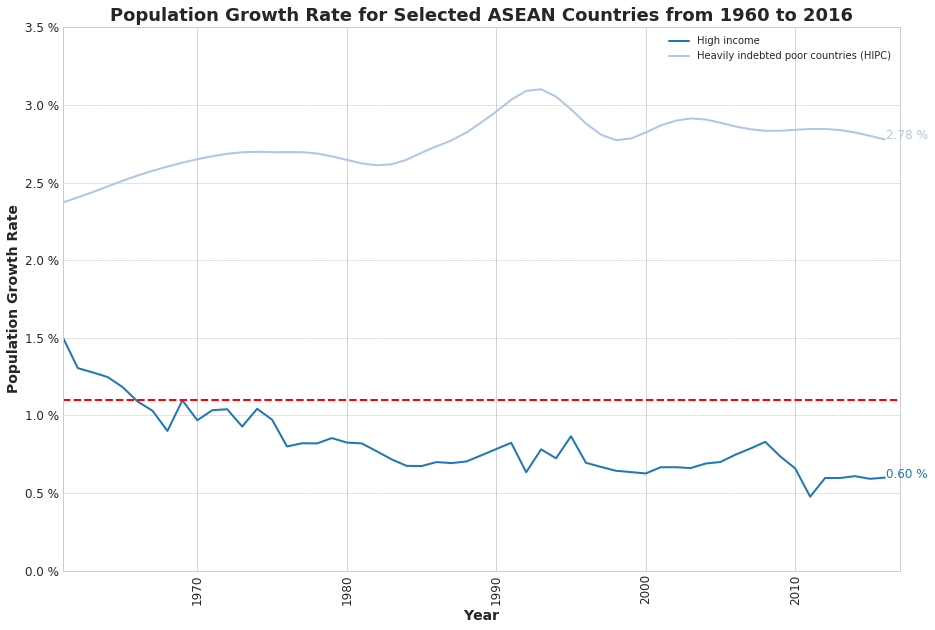

In [21]:
#use a function so that changes made inside the function, especially those concerning variable names will not affect the whole notebook
def plot_population_growth_rate2():
    
    #create a plot showing the population growth rate of each country
    #set the plot size in inches
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    #make a list of countries to analyze
    countries = ['High income','Heavily indebted poor countries (HIPC)']

    #make a list of colors to be used
    color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#6600ff']

    for index, item in enumerate(countries):
        #obtain the data
        data = growth_rate_country[item]

        #set the x and y values
        x_values = list(data['year'])
        y_values = list(data['growth_rate'])

        #plot the graph
        ax.plot(x_values, y_values, lw = 2.0, color=color_sequence[index], label = item) # addint the label term allows us to add a legend later

        plt.text(2016.1, y_values[-1], '{:.2f} %'.format(y_values[-1]), fontsize = 12, color = color_sequence[index])


    #add a horizontal line indicating the sustainable growth rate
    ax.axhline(y=1.1, linewidth = 2, color='red', linestyle = '--')
    
    #format the x-tick labels    
    plt.xticks(rotation = 90, family = 'sans-serif', fontsize = 12)

    #format the y-tick labels
    def percent(x, pos):
        'The two args are the value and tick position'
        return '{} %'.format(x)

    formatter = FuncFormatter(percent)

    ax.yaxis.set_major_formatter(formatter)
    plt.yticks(family = 'sans-serif', fontsize = 12)

    #add titles, axis labels, set the font size, weight, and family
    plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
    plt.ylabel('Population Growth Rate', family = 'sans-serif', fontsize = 14, weight = 'bold')
    plt.title('Population Growth Rate for Selected ASEAN Countries from 1960 to 2016', family = 'sans-serif', size = 18, 
              weight = 'bold')

    #set the limit of the plotting area
    #add 1 year on both sides of the x-axis for aesthetic purpose
    plt.xlim(1961,2017)
    plt.ylim(0,3.5)

    #create a grid for for easier reading
    plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

    #remove the tickmarks
    plt.tick_params(axis='both', which='both', bottom='off', top='off',
                    labelbottom='on', left='off', right='off', labelleft='on')

    plt.legend()

    #export the plot in any of the following format: jpeg, png, pdf, etc... (uncomment the code below to do that)
    #plt.savefig('population_growth_rate_asean.jpeg', bbox_inches='tight')

    plt.show()

plot_population_growth_rate2()

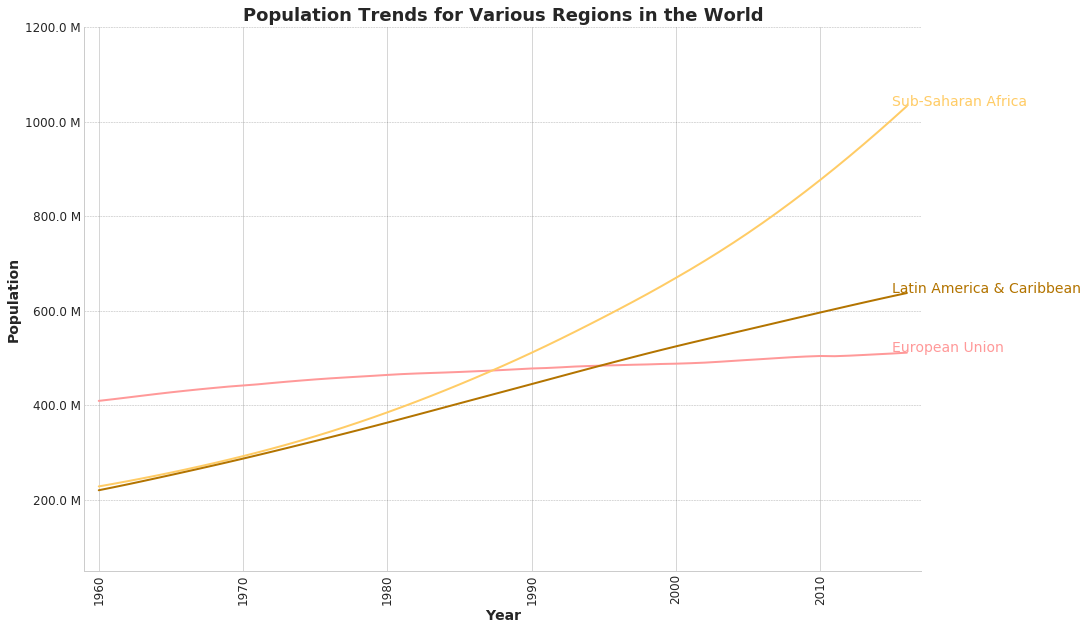

In [22]:
#set the plot size in inches
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


#select a color scheme
color_sequence = ['#ff9999',
                  '#ffcc66', '#b37400', '#cc0099', '#002db3', '#00cc00', '#00cccc', '#e600e6',
                  '#ffb3ff', '#99b3ff', '#990000', '#ccff99', '#99ffff', '#9999ff', '#e699ff',
                  '#00b33c', '#b3ffcc', '#99e6e6', '#0073e6', '#003366']

#remove the spines from the top and the bottom of the figure
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for index, country in enumerate(['European Union', 'Sub-Saharan Africa', 'Latin America & Caribbean']):
    
    #obtain the total population data from each country
    data_country = data_population[data_population['Country Name'] == country]
    data_country = data_country.iloc[0,2:]
    
    #get the x_axis and y_axis
    y_axis = list(data_country)
    x_axis = data_country.index.astype(int) #change the datatype (it is a string change it to int)
    
    #plot
    ax.plot(x_axis, y_axis, lw = 2.0, color=color_sequence[index])
    
    #insert a label on the line
    plt.text(2015, y_axis[-1]+500000, country, fontsize = 14, color = color_sequence[index])


#format the ticklabels    
plt.xticks(rotation = 90, family = 'sans-serif', fontsize = 12)

#use FuncFormatter for the y-tick labels
#the function below was copied from the documentation for FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '{} M'.format((x*1e-6))

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)
plt.yticks(family = 'sans-serif', fontsize = 12)

#add titles, axis labels, set the font size, weight, and family
plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
plt.ylabel('Population', family = 'sans-serif', fontsize = 14, weight = 'bold')
plt.title('Population Trends for Various Regions in the World', family = 'sans-serif', size = 18, 
          weight = 'bold')

#set the limit of the plotting area
#add 1 year on both sides of the x-axis for aesthetic purpose
plt.xlim(1959,2017)
plt.ylim(50000000,1200000000)

#create a grid for for easier reading
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

#remove the tickmarks
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')


#export the plot in any of the following format: jpeg, png, pdf, etc... (uncomment the code below to do that)
#plt.savefig('population_trends_asean.jpeg', bbox_inches='tight')

#show the plot
plt.show()


## Trends in World Population

The world's population has grown from 3 to 7 billion in a 46 year span--the fastest rate in human history. This can be mostly attributed to better health care which improved infant mortality rates, lengthen the life span, and decreased the amount of epidemics.

However, the population growth is not evenly distributed. Looking at the 20 most populous countries in 1960 and in 2016 there are several notable observations:

1. European countries (United Kingdom, France, Italy, Spain, Poland, and Ukraine) are in the top 20 list in 1960 but are excluded in 2016.
2. Third-world countries (Egypt, Ethiopia, the Philippi, Congo, Thailand, and Iran) are now in the top 20 in their stead.
3. In fact, most of the population growth is happening in poorer countries. While the population of the EU has remained stagnant, the population in the "poorer" parts of the world such as in Sub-Saharan Africa, and Latin America is steadily increasing.
4. This shifting population dynamic will have an impact on geo-politics. In successive analysis, we will use and expound on the results of this analysis to tie it to the larger picutre of economic development.  


In [23]:
#load the data obtained from Philippine Statistics Authority; and check their data types
phil_pop_byregion = pd.read_csv('data_sources/philippine_population_by_region.csv')
phil_pop_byregion.head()

,Region,1960,1970,1975,1980,1990,1995,2000,2007,2010,2015
0,NATIONAL CAPITAL REGION,"2,462,488","3,966,695","4,970,006","5,925,884","7,948,392","9,454,040","9,932,560","11,547,959","11,855,975","12,877,253"
1,CORDILLERA ADMINISTRATIVE REGION,"551,032","730,906","811,103","914,432","1,146,191","1,254,838","1,365,220","1,520,847","1,616,867","1,722,006"
2,REGION I - ILOCOS,"2,042,865","2,488,391","2,726,220","2,922,892","3,550,642","3,803,890","4,200,478","4,546,789","4,748,372","5,026,128"
3,REGION II - CAGAYAN VALLEY,"1,035,750","1,462,723","1,665,245","1,919,091","2,340,545","2,536,035","2,813,159","3,051,487","3,229,163","3,451,410"
4,REGION III - CENTRAL LUZON,"2,568,206","3,695,955","4,300,196","4,909,938","6,338,590","7,092,191","8,204,742","9,709,177","10,137,737","11,218,177"


In [24]:
phil_pop_byregion.columns

Index(['Region', '1960', '1970', '1975', '1980', '1990', '1995', '2000',
       '2007', '2010', '2015'],
      dtype='object')

In [25]:
#convert the data types in the years column to int
census_years = ['1960', '1970', '1975', '1980', '1990', '1995', '2000',
       '2007', '2010', '2015']

#define a function to remove the comma and turn the values into numeric type

def to_num(column):
    return int(column.replace(',',''))

for year in census_years:
    phil_pop_byregion[year] = phil_pop_byregion[year].apply(to_num)

In [26]:
#check that the columns types have changed
phil_pop_byregion.dtypes

Region    object
1960       int64
1970       int64
1975       int64
1980       int64
1990       int64
1995       int64
2000       int64
2007       int64
2010       int64
2015       int64
dtype: object

In [27]:
#add a column for simplified region name 
phil_pop_byregion['Region Name'] = ['NCR', 'CAR', 'Ilocos', 'Cagayan Valley', 'Central Luzon', 'CALABARZON', 'MIMAROPA',
                                   'Bicol','Western Visayas', 'Central Visayas', 'Negros Island', 'Eastern Visayas',
                                   'Zamboanga Peninsula', 'Northern Mindanao', 'Davao', 'SOCCSKSARGEN', 'CARAGA', 'ARMM']

In [28]:
phil_pop_byregion.head()

,Region,1960,1970,1975,1980,1990,1995,2000,2007,2010,2015,Region Name
0,NATIONAL CAPITAL REGION,2462488,3966695,4970006,5925884,7948392,9454040,9932560,11547959,11855975,12877253,NCR
1,CORDILLERA ADMINISTRATIVE REGION,551032,730906,811103,914432,1146191,1254838,1365220,1520847,1616867,1722006,CAR
2,REGION I - ILOCOS,2042865,2488391,2726220,2922892,3550642,3803890,4200478,4546789,4748372,5026128,Ilocos
3,REGION II - CAGAYAN VALLEY,1035750,1462723,1665245,1919091,2340545,2536035,2813159,3051487,3229163,3451410,Cagayan Valley
4,REGION III - CENTRAL LUZON,2568206,3695955,4300196,4909938,6338590,7092191,8204742,9709177,10137737,11218177,Central Luzon


In [29]:

phil_pop_byregion[phil_pop_byregion['Region'] == 'CORDILLERA ADMINISTRATIVE REGION']['Region Name']


1    CAR
Name: Region Name, dtype: object

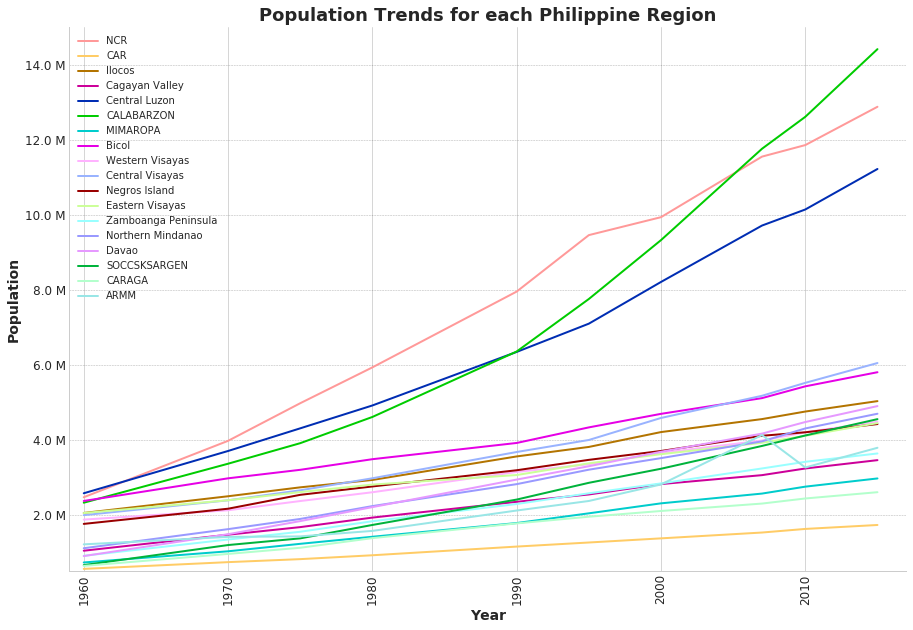

In [30]:
#plot the population data by region
#set the plot size in inches
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


#select a color scheme
color_sequence = ['#ff9999',
                  '#ffcc66', '#b37400', '#cc0099', '#002db3', '#00cc00', '#00cccc', '#e600e6',
                  '#ffb3ff', '#99b3ff', '#990000', '#ccff99', '#99ffff', '#9999ff', '#e699ff',
                  '#00b33c', '#b3ffcc', '#99e6e6', '#0073e6', '#003366']

#remove the spines from the top and the bottom of the figure
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for index, region in enumerate(phil_pop_byregion['Region']):
    
    #get the x_axis and y_axis
    y_axis = phil_pop_byregion[phil_pop_byregion['Region'] == region ].iloc[0, 1:11]
    x_axis = [int(i) for i in census_years] #change the datatype (it is a string change it to int)

    label = phil_pop_byregion[phil_pop_byregion['Region'] == region]['Region Name'].loc[index]
    #plot
    ax.plot(x_axis, y_axis, lw = 2.0, color=color_sequence[index], 
            label = label)
    


#format the ticklabels    
plt.xticks(rotation = 90, family = 'sans-serif', fontsize = 12)

#use FuncFormatter for the y-tick labels
#the function below was copied from the documentation for FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '{} M'.format((x*1e-6))

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)
plt.yticks(family = 'sans-serif', fontsize = 12)

#add titles, axis labels, set the font size, weight, and family
plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
plt.ylabel('Population', family = 'sans-serif', fontsize = 14, weight = 'bold')
plt.title('Population Trends for each Philippine Region', family = 'sans-serif', size = 18, 
          weight = 'bold')

#set the limit of the plotting area
#add 1 year on both sides of the x-axis for aesthetic purpose
plt.xlim(1959,2017)
plt.ylim(500000,15000000)

#create a grid for for easier reading
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

#remove the tickmarks
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')


#export the plot in any of the following format: jpeg, png, pdf, etc... (uncomment the code below to do that)
#plt.savefig('population_trends_asean.jpeg', bbox_inches='tight')


plt.legend()

#show the plot
plt.show()


